### CNN with tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.19.0


# import dataset from keras's fashion_mnist

In [7]:
mnist=tf.keras.datasets.fashion_mnist

In [8]:
(training_images, training_labels), (test_images, test_labels)=mnist.load_data()

## preprocessing dataset

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

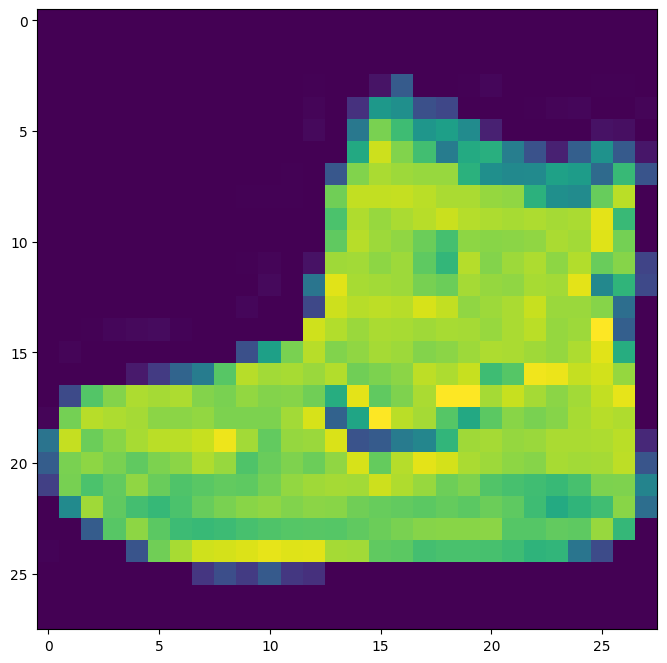

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [10]:
#all the values are integers between 0 and 255. When training a neural network,
# it's easier to treat all values as between 0 and 1, a process called normalization

training_images  = training_images / 255.0
test_images = test_images / 255.0

# model design
- Sequential defines a sequence of layers in the neural network.
- Flatten takes a square and turns it into a one-dimensional vector.
- Dense adds a layer of neurons.
- Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
- Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
- Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

- **note**:  it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now your data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to flatten that 28,28 into a 784x1.

Instead of writing all the code, add the Flatten() layer at the beginning

In [18]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(13,activation=tf.nn.softmax)
])


# Compile and train  designed model
- use of metrics= as a parameter, which allows TensorFlow to report on the accuracy of the training by checking the predicted results against the known answers (the labels).

In [19]:
# compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7822 - loss: 0.6355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8639 - loss: 0.3777
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8786 - loss: 0.3381
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8860 - loss: 0.3137
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8912 - loss: 0.2909


In [14]:
# test
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3551


[0.355475515127182, 0.8726999759674072]

In [15]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.2206560e-06 1.7640316e-08 2.8687273e-07 6.4562784e-08 2.3376201e-06
 1.4323500e-01 2.2476599e-06 9.6408710e-02 4.8131940e-05 7.6030004e-01]


label: 9 



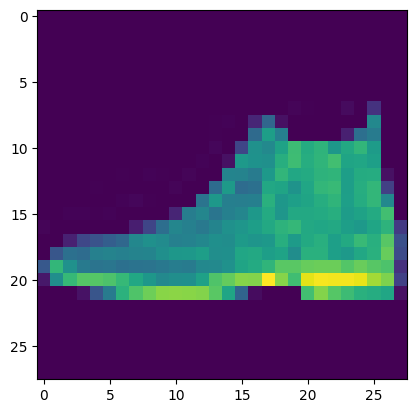

In [28]:
print("label:",test_labels[0],"\n")
plt.imshow(test_images[0])

## Exercise

In [20]:
# Question: what if we dont normalise walue between(0,1):- reduce probability accuracy

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 15.2040
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.5252
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.5037
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.4977
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.4948
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5576
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.1400495e-20 7.4090378e-14 2.4517487e-24 5.2767075e-27 2.2851658e-33
 6.5281257e-02 3.6257503e-21 4.1773867e-02 8.0397102e-09 8.9294487e-01]
9


In [21]:
# if accuracy reach 95 before completion of all epoc:- stop training
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7942 - loss: 0.5864
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8683 - loss: 0.3615
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8800 - loss: 0.3230
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8869 - loss: 0.3004
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8967 - loss: 0.2760
